In [ ]:
# In pursuit of issue
# https://github.com/micropython/micropython/issues/4212#issuecomment-601505389

In [2]:
0xFFFFFFFF/(0x42460000 - 0x41460000)
256*13

255.99999994039536

In [140]:
import struct
hex(struct.unpack("I", struct.pack("f", 12.375))[0])

'0x41460000'

In [6]:
struct.unpack("f", struct.pack("I", 0x41C80000))

(25.0,)

In [81]:
import math
def conv(x):
    sign = (x&0x80000000)
    e = ((x&0x7f800000)>>23)
    if e == 255:
        return math.nan
    if e == 0:
        exp = -126
        mantissa = (x&0x007FFFFF)
    else:
        exp = e - 127
        mantissa = (x&0x007FFFFF)|0x00800000
    r = mantissa*2**(exp-23)
    if sign:
        r = -r
    return r

x = 0xc1C80000
conv(x)

-25.0

In [119]:
import random
n = 10000
sample =[ random.randint(0,0xFFFFFFFF)  for i in range(n) ]
for j, i in enumerate(sample):
    f = struct.unpack("f", struct.pack("I", i))[0]
    g = conv(i)
    assert f == g or (math.isnan(f) and math.isnan(g)), (f,g,j)

In [120]:
f, g

(2238002944.0, 2238002944)

In [59]:
x = 0x41460000
e = ((x&0x7f800000)>>23)
exp = e - 126
mantissa = (x&0x007FFFFF)|0x00800000
print(hex(mantissa))
# mantissa must have top byte free
assert mantissa & 0xFF000000 == 0

# fractional part
if exp > 0:
    fmant = (mantissa << exp) & 0x00FFFFFF
else:
    fmant = mantissa
print(fmant)
fser = [ ]
while fmant != 0:
    fmant *= 10
    #if exp < 0:
    #    while fmant & 1
    fser.append(chr(ord('0')+(fmant>>24)))
    fmant &= 0x00FFFFFF
fser
    
    

#imant = mantissa>>(24-exp)
#fmant = (mantissa<<(8+exp))&0xFFFFFFFF
#fmant



0xc60000
6291456


['3', '7', '5']

In [58]:
hex(6291456)

'0x600000'

In [64]:
def decdig(d):
    assert 0 <= d <= 9
    return chr(ord('0')+d)

def fracseries(fmant24, exp):
    fser = [ "0", "." ]
    while fmant24 != 0:
        fmant24 *= 10
        #if exp < 0:
        #    while fmant24 & 1
        fser.append(decdig(fmant24>>24))
        fmant24 &= 0x00FFFFFF
    return "".join(fser)

fracseries(0x00600001, 0)


'0.375000059604644775390625'

In [69]:
0.375000059604644775390625

0.3750000596046448

In [78]:
import struct
hex(struct.unpack("I", struct.pack("f", 0.37500005))[0])

'0x3ec00002'

In [146]:
sum((0.5)**(y+1)  for y in range(32)  if fmant&(0x80000000>>y))


0.375

In [51]:
s = fmant>>4
for i in range(4):
    s *= 10
    print(s>>28)
    s &= 0x0FFFFFFF


3
7
5
0


In [160]:
fval = 145.1123
fval

145.1123

In [ ]:
# Work out a C-code jupyter notebook!!!

In [172]:
#####  Work out printing scientific printing formatfloat.c code first
fval = 145.1123
fvalexp10 = 0
while fval >= 10.0:
    fval *= 0.1
    fvalexp10 += 1
while fval <= 1.0:
    fval = 10.0
    fvalexp10 -= 1
#hex(struct.unpack("I", struct.pack("f", 0.37500005))[0])
fval, fvalexp10

ifval = struct.unpack("I", struct.pack("f", fval))[0]
e = ((ifval&0x7f800000)>>23)
exp = e - 126
assert exp > 0
mantissa = (ifval&0x007FFFFF)|0x00800000
imant = ((mantissa << exp) & 0xFF000000) >> 24
fmant = (mantissa << exp) & 0x00FFFFFF

fser = [ chr(ord('0')+imant), "."]
for i in range(7):
    fmant *= 10
    fser.append(chr(ord('0')+(fmant>>24)))
    fmant &= 0x00FFFFFF
fser.append("e")
fser.append("%d"%(fvalexp10))
s = "".join(fser)
s, float(s)



('1.4511229e2', 145.11229)

In [164]:
"%e" % -0.01235

'-1.235000e-02'

In [8]:
import numpy
numpy.arange(0, 10, 1)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [46]:
nbits = 12
binseries = [ 0.5**(y+1)  for y in range(nbits) ]
bitseries = [ 1<<(nbits-y-1)  for y in range(nbits)]
#bitseries = [ 1<<(y)  for y in range(nbits)]
fracs = numpy.zeros(2**nbits)
for i in range(len(fracs)):
    fracs[i] = sum(binseries[y]  for y in range(nbits)  if i & bitseries[y])
len(fracs)


4096

In [47]:
d0 = ((fracs*10).astype(int))
d1 = numpy.mod((fracs*100).astype(int), 10)
d2 = numpy.mod((fracs*1000).astype(int), 10)
d1


array([0, 0, 0, ..., 9, 9, 9])

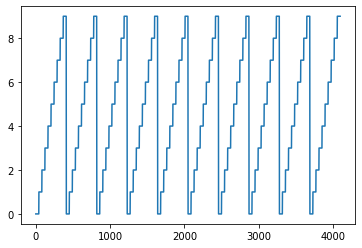

In [48]:
from matplotlib import pyplot
plt.plot(d1)

In [38]:
s0 = d0[1:] - d0[:-1]
t0 = [ i+1  for i in range(len(s0))  if s0[i] ]
t0 = numpy.array([0]+t0)
t0[1:] - t0[:-1]


array([410, 410, 409, 410, 409, 410, 410, 409, 410])

In [39]:
s1 = d1[1:] - d1[:-1]
t1 = [ i+1  for i in range(len(s1))  if s1[i] ]
t1 = numpy.array([0]+t1)
t1[1:] - t1[:-1]

array([41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41,
       41, 41, 41, 41, 41, 41, 41, 40, 41, 41, 41, 41, 41, 41, 41, 41, 41,
       41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 40, 41,
       41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41,
       41, 41, 41, 41, 41, 41, 40, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41,
       41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41])